**Replace with your name and a brief description of the notebook.**

# Homework 19

The Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market/college-labor-market_compare-majors.html).

The data in this table can be downloaded as an Excel file at the bottom of the page. If you open this file in Excel, you can save the last table as a CSV file. 

Alternatively, download the data as a CSV file from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv).

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

### Question 1: Load and clean the data

This data file requires some cleaning.  Open the CSV file in Jupyter or another text editor to see what the possible problems are, and refer to Lab 4 for how to fix them. 

In [10]:
# skip the first 13 rows and last 3 rows of the file
labor = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv", skiprows = 13, skipfooter = 3)
labor.head()

/Users/megan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,"40,000","65,000",20.8
1,Animal and Plant Sciences,2.6,58.6,"37,000","63,000",35.1
2,Environmental Studies,3.9,53.7,"39,000","65,000",30.5
3,Architecture,2.2,27.9,"50,000","76,000",41.0
4,Ethnic Studies,5.1,51.9,"40,000","67,000",48.6


In [4]:
labor.dtypes

Major                          object
Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career       object
Median Wage Mid-Career         object
Share with Graduate Degree    float64
dtype: object

In [11]:
# remove the commas from Median Wage Early Career and Median Wage Mid-Career, and convert these columns to ints
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(int)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(int)

In [12]:
labor.head()

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,40000,65000,20.8
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1
2,Environmental Studies,3.9,53.7,39000,65000,30.5
3,Architecture,2.2,27.9,50000,76000,41.0
4,Ethnic Studies,5.1,51.9,40000,67000,48.6


In [13]:
labor.dtypes

Major                          object
Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career        int64
Median Wage Mid-Career          int64
Share with Graduate Degree    float64
dtype: object

### Question 2: K-Means Clustering (unscaled)

a) Create a DataFrame x with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree).

In [15]:
x = labor[["Unemployment Rate","Underemployment Rate", "Median Wage Early Career", "Median Wage Mid-Career", "Share with Graduate Degree"]]
x.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,3.0,60.3,40000,65000,20.8
1,2.6,58.6,37000,63000,35.1
2,3.9,53.7,39000,65000,30.5
3,2.2,27.9,50000,76000,41.0
4,5.1,51.9,40000,67000,48.6


2b) Use the K-Means clustering algorithm to group the data into 4 groups.

In [20]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
clusters = kmeans.predict(x)
clusters

array([3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 1, 0, 0, 2, 0, 3,
       3, 3, 1, 3, 2, 3, 0, 3, 3, 2, 3, 3, 1, 3, 1, 3, 0, 2, 3, 0, 0, 0,
       2, 0, 2, 0, 3, 0, 0], dtype=int32)

2c) Add a column with the assigned clusters to your original DataFrame, and plot the scatterplots of all pairs of quantitative variables, colored by the clusters.  How well do you think the clustering worked?

In [21]:
labor["clusters"] = clusters

/Users/megan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/megan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/megan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


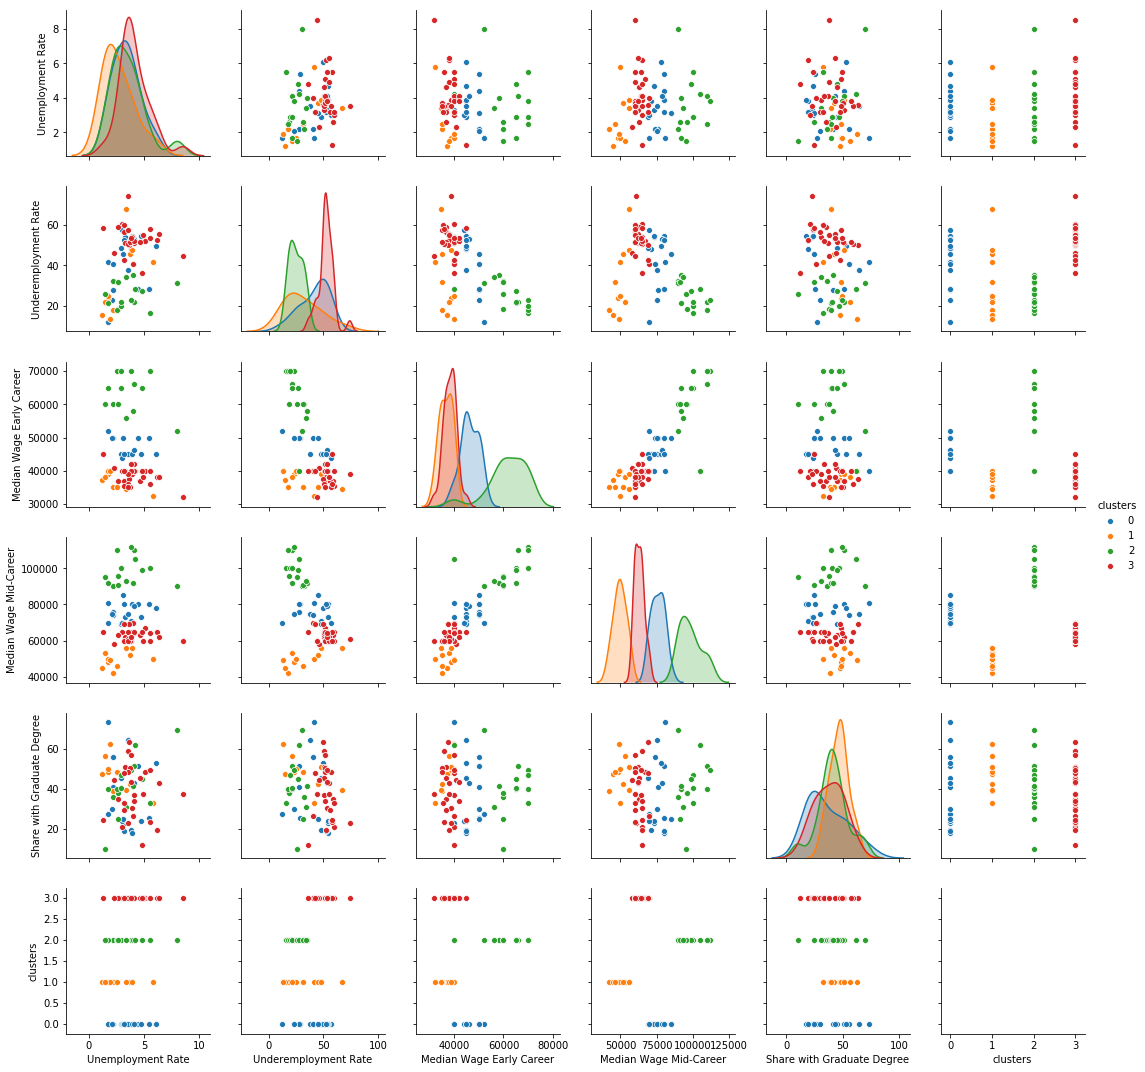

In [25]:
sns.pairplot(labor, hue = "clusters")

**2c answer:** The clustering worked fairly well, since we can see the data divided into 4 distinct regions in many of the scatterplots (ex. Share with Graduate Degree vs. Median Wage Mid-Career or Median Wage Mid-Career vs. Median Wage Early Career).  However, in these cases, even though the points in the same cluster are all near each other and do not significantly overlap with other clusters, the different regions are immediately next to each other.  Additionally, for some scatterplots (ex. Share with Graduate Degree and Unemployment Rate), the data points assigned to each cluster are all mixed together.

2d) Look at your DataFrame to see which majors have been grouped into which cluster.  Do these groupings make sense?  Why or why not? 

In [27]:
# filter by each cluster number to easily see which majors belong to that cluster
labor[labor["clusters"] == 0]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
3,Architecture,2.2,27.9,50000,76000,41.0,0
5,Communications,3.3,54.0,40000,73000,22.9,0
8,Advertising and Public Relations,3.8,47.9,45000,71000,19.4,0
9,Information Systems & Management,5.4,28.4,50000,80000,25.2,0
31,Biochemistry,1.7,41.6,40000,81000,73.4,0
33,Mathematics,4.4,28.3,50000,80000,51.6,0
39,Chemistry,3.5,37.6,45000,75000,64.6,0
40,Earth Sciences,2.9,48.4,45000,69000,45.2,0
42,Miscellaneous Physical Sciences,2.2,40.6,50000,74000,56.0,0
50,Political Science,6.1,49.5,45000,78000,52.8,0


In [28]:
labor[labor["clusters"] == 1]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
11,General Education,1.7,23.7,39000,48000,48.2,1
12,Early Childhood Education,2.2,17.8,35000,42000,38.7,1
13,Elementary Education,1.2,15.5,37300,45000,47.5,1
14,Secondary Education,1.7,25.0,40000,50000,49.7,1
15,Special Education,1.9,13.6,40000,49000,62.5,1
16,Miscellaneous Education,1.5,21.9,38000,53000,56.6,1
27,Family and Consumer Sciences,5.8,41.7,32300,50000,32.6,1
38,Theology and Religion,3.7,45.3,35000,52000,42.5,1
46,Social Services,2.5,31.5,35000,46000,48.3,1
56,Performing Arts,3.4,67.6,34600,56000,39.2,1


In [29]:
labor[labor["clusters"] == 2]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
10,Computer Science,5.5,16.4,70000,100000,32.7,2
17,General Engineering,2.2,32.4,60000,90000,36.0,2
18,Aerospace Engineering,4.1,21.7,66000,110000,51.2,2
19,Chemical Engineering,3.8,22.9,70000,112000,49.2,2
20,Civil Engineering,2.6,18.4,60000,96000,38.0,2
21,Computer Engineering,2.5,18.0,70000,110000,40.0,2
22,Electrical Engineering,2.9,19.8,70000,100000,47.0,2
23,Industrial Engineering,1.7,21.4,65000,92000,39.7,2
24,Mechanical Engineering,2.9,21.8,65000,100000,40.5,2
25,Miscellaneous Engineering,4.8,27.1,65000,99000,44.9,2


In [30]:
labor[labor["clusters"] == 3]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
0,Agriculture,3.0,60.3,40000,65000,20.8,3
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1,3
2,Environmental Studies,3.9,53.7,39000,65000,30.5,3
4,Ethnic Studies,5.1,51.9,40000,67000,48.6,3
6,Journalism,4.0,40.8,40000,70000,26.2,3
7,Mass Media,6.2,52.3,38000,65000,19.2,3
26,Foreign Language,3.3,50.9,37000,62000,50.8,3
28,English Language,4.6,51.2,37000,63000,45.3,3
29,Liberal Arts,3.2,56.4,37000,60000,29.5,3
30,Biology,3.6,50.1,37600,69000,63.3,3


**2d answer:** Similar majors seem to have been grouped together in the clusters, which makes sense since they would have similar career prospects.  For example, cluster 0 consists of science majors, some business-related majors, and a few random majors like architecture and nursing.  Cluster 1 consists of education, social services, arts, and religion (which are all relatively low paying).  Cluster 2 consists of the engineering majors, as well as other majors with a high mid-career wage, like pharmacy and finance.  Cluster 3 consists of social sciences and some biological sicences, as well as other miscellaneous majors, like history.

Overall, it seems like the majors have been grouped by the median early and mid-career wages, which makes sense because the values in these columns are much bigger than those in the other three columns and we did not scale our input data.

### Question 3: K-Means Clustering (scaled)

a) Create a DataFrame `x_scaled` with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree) scaled to be between 0 and 1.

In [33]:
scaler = MinMaxScaler()

In [34]:
x_scaled = scaler.fit_transform(x)

3b) Use the K-Means clustering algorithm to group the scaled data into 4 groups.

In [35]:
kmeans_scaled = KMeans(n_clusters = 4)
kmeans_scaled.fit(x_scaled)
clusters_scaled = kmeans_scaled.predict(x_scaled)

3c) Add a column with the assigned clusters from 3b to your original DataFrame, and plot the scatterplots of all pairs of quantitative variables, colored by these clusters.  How well do you think the clustering of scaled data worked?

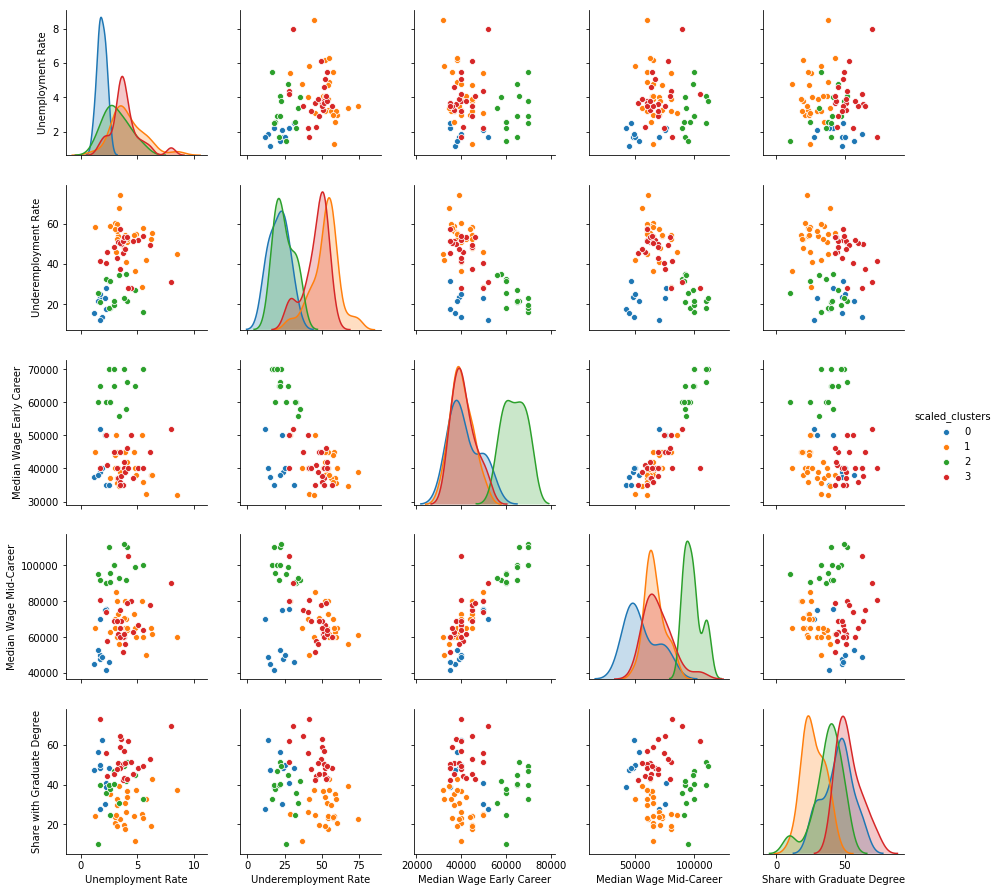

In [37]:
labor["scaled_clusters"] = clusters_scaled
sns.pairplot(labor, vars = ["Unemployment Rate","Underemployment Rate", "Median Wage Early Career", "Median Wage Mid-Career", "Share with Graduate Degree"], hue = "scaled_clusters")

**3c answer:** In some ways, the clusters look worse than in Question 2 because almost all scatter plots have some overlap of the clusters.  In particular, clusters 1 and 3 often overlap.  Also, the data points in cluster 0 often look fairly spread out, relative to the size of the cluster.  However, in all scatterplots there appears to be some separation between at least some of the clusters, whereas some of the scatter plots in Question 2 all of the clusters were on top of each other.

3d) Look at your DataFrame to see which majors have been grouped into which cluster of the scaled data. Do these groupings make sense? Why or why not?

In [38]:
labor[labor["scaled_clusters"] == 0]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,scaled_clusters
3,Architecture,2.2,27.9,50000,76000,41.0,0,0
11,General Education,1.7,23.7,39000,48000,48.2,1,0
12,Early Childhood Education,2.2,17.8,35000,42000,38.7,1,0
13,Elementary Education,1.2,15.5,37300,45000,47.5,1,0
14,Secondary Education,1.7,25.0,40000,50000,49.7,1,0
15,Special Education,1.9,13.6,40000,49000,62.5,1,0
16,Miscellaneous Education,1.5,21.9,38000,53000,56.6,1,0
46,Social Services,2.5,31.5,35000,46000,48.3,1,0
60,Nursing,1.7,12.1,52000,70000,27.5,0,0
64,Accounting,2.1,23.1,50000,75000,30.0,0,0


In [43]:
labor[labor["scaled_clusters"] == 1]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,scaled_clusters
0,Agriculture,3.0,60.3,40000,65000,20.8,3,1
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1,3,1
2,Environmental Studies,3.9,53.7,39000,65000,30.5,3,1
5,Communications,3.3,54.0,40000,73000,22.9,0,1
6,Journalism,4.0,40.8,40000,70000,26.2,3,1
7,Mass Media,6.2,52.3,38000,65000,19.2,3,1
8,Advertising and Public Relations,3.8,47.9,45000,71000,19.4,0,1
9,Information Systems & Management,5.4,28.4,50000,80000,25.2,0,1
27,Family and Consumer Sciences,5.8,41.7,32300,50000,32.6,1,1
29,Liberal Arts,3.2,56.4,37000,60000,29.5,3,1


In [44]:
labor[labor["scaled_clusters"] == 2]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,scaled_clusters
10,Computer Science,5.5,16.4,70000,100000,32.7,2,2
17,General Engineering,2.2,32.4,60000,90000,36.0,2,2
18,Aerospace Engineering,4.1,21.7,66000,110000,51.2,2,2
19,Chemical Engineering,3.8,22.9,70000,112000,49.2,2,2
20,Civil Engineering,2.6,18.4,60000,96000,38.0,2,2
21,Computer Engineering,2.5,18.0,70000,110000,40.0,2,2
22,Electrical Engineering,2.9,19.8,70000,100000,47.0,2,2
23,Industrial Engineering,1.7,21.4,65000,92000,39.7,2,2
24,Mechanical Engineering,2.9,21.8,65000,100000,40.5,2,2
25,Miscellaneous Engineering,4.8,27.1,65000,99000,44.9,2,2


In [45]:
labor[labor["scaled_clusters"] == 3]

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,scaled_clusters
4,Ethnic Studies,5.1,51.9,40000,67000,48.6,3,3
26,Foreign Language,3.3,50.9,37000,62000,50.8,3,3
28,English Language,4.6,51.2,37000,63000,45.3,3,3
30,Biology,3.6,50.1,37600,69000,63.3,3,3
31,Biochemistry,1.7,41.6,40000,81000,73.4,0,3
32,Miscellaneous Biological Science,3.5,50.5,36000,65000,59.1,3,3
33,Mathematics,4.4,28.3,50000,80000,51.6,0,3
35,Nutrition Sciences,2.3,45.9,41000,58000,44.3,3,3
37,Philosophy,3.8,51.6,40000,60000,57.2,3,3
38,Theology and Religion,3.7,45.3,35000,52000,42.5,1,3


**3d answer:** In scaled cluster 0, we can see that most of the education majors stayed in the same cluster, but were joined by other majors with low unemployment.  Scaled cluster 1 becomes a mix of the previous 0 and 3 clusters, and the majors in it have a high underemployment rate, as well as similar early and mid-career median wages.  It's a mix of business and social science (and some biological science) majors.  Cluster 2 retains also all the same majors - the engineering ones plus some high wage business ones.  Finally, cluster 3 is a mix of science, social science, and humanities with a high share with graduate degrees.

3e) Which data gave better clusters: the scaled or unscaled data?  Why?

**3e answer:** It depends what you are looking for.  The unscaled data grouped majors by their median early and mid-career wages, while the scaled data took the other three columns into account.  The scaled data gives a better holistic grouping of the majors, while the unscaled data clusters would be better if someone was only concerned about the actual wages.